# Dataset setting 

In [28]:
from sklearn import datasets as skdata
from pandas import DataFrame,read_csv,merge,pivot

In [29]:
data=read_csv("../데이터/생명연구자원-AI활용-경진대회-train.csv")

In [30]:
columns=data.columns.difference(["ID","SUBCLASS"]).to_list()

X=data[columns]
y=data.SUBCLASS

DF=merge(X,y,left_index=True,right_index=True)

## Subset search

model setting

train/test dataset setting

scoring setting

### Forword Serch

In [31]:
from sklearn import model_selection as mod
from sklearn import pipeline as pipe
from sklearn import preprocessing as pre
from sklearn import linear_model as lin
from sklearn import metrics as met
import numpy as np
import multiprocessing as multi

모델과 성능평가

In [32]:
kfold=mod.RepeatedStratifiedKFold(n_repeats=5,n_splits=2,random_state=1)

In [42]:
total_cate={col:X[col].unique() for col in X.columns}

In [34]:
score=met.accuracy_score

In [35]:
def valid_feature(column_name:list,queue):

    sub_X=X[column_name]
    categories=[total_cate[col] for col in column_name]

    model=pipe.Pipeline([("원핫인코더",pre.OneHotEncoder(categories=categories
                                                    ,handle_unknown="ignore"))
               ,("로지스틱회귀",lin.LogisticRegression())])
    
    valid_score=[]

    for trian_idx,test_idx in kfold.split(sub_X,y):
        train_X,train_y=sub_X.loc[trian_idx],y.loc[trian_idx]
        test_X,test_y=sub_X.loc[trian_idx],y.loc[trian_idx]

        model.fit(train_X,train_y)

        y_pred=model.predict(test_X)
        valid_score.append(score(y_true=test_y,y_pred=y_pred))
    
    queue.put(np.array(valid_score).mean())

In [36]:
def forward_search(candidate_:list=list()):
    total_features=X.columns.to_list()

    sub_feature_set=[[col] for col in total_features if col not in candidate_]

    processes,queue=[],multi.Queue()

    for feature in sub_feature_set:
        Procss=multi.Process(target=valid_feature,args=(candidate_+[feature],queue))
        Procss.start()
    
    for process in processes:
        process.join()
    
    return [queue.get() for _ in range(len(sub_feature_set))]

In [37]:
if __name__=="main":
    result=forward_search()

In [39]:
que_test=multi.Queue()

In [40]:
valid_feature(["A2M"],que_test)

## Entropy

In [44]:
from scipy import stats as scs
import numpy  as np

In [45]:
base=2 # bite
pk=y.value_counts()/y.count() #each posability

In [46]:
scs.entropy(pk.values,base=base)

np.float64(4.436307804042774)

In [47]:
sum(-pk.values*np.log2(pk.values))

np.float64(4.436307804042774)

In [ ]:
print("attribute name :",X.columns[0])

attribute name : A2M


In [48]:
DF

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX,SUBCLASS
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,KIPAN
1,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,SARC
2,R895R,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,SKCM
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,KIRC
4,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,GBMLGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,LUAD
6197,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,LGG
6198,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,T181S,WT,COAD
6199,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,TGCT


In [49]:
from pandas import crosstab

In [50]:
crt=crosstab(index=DF.A2M,columns=DF.SUBCLASS)

In [54]:
crt

SUBCLASS,ACC,BLCA,BRCA,CESC,COAD,DLBC,GBMLGG,HNSC,KIPAN,KIRC,...,PAAD,PCPG,PRAD,SARC,SKCM,STES,TGCT,THCA,THYM,UCEC
A2M,,,,,,,,,,,,,,,,,,,,,
A1043T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A1061V I1056I,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
A1108T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
A1379A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
A615A,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W739*,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
WT,72,95,779,152,212,36,458,217,510,331,...,119,146,266,194,245,358,122,324,98,183
Y1055C,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
entropy_dict={}
for col in crt.columns:
    pk=crt[col]/crt[col].sum()
    entropy_dict[col]=scs.entropy(pk,base=2)

In [60]:
entropy_dict

{'ACC': np.float64(0.0),
 'BLCA': np.float64(0.6991293066849379),
 'BRCA': np.float64(0.09845096718221932),
 'CESC': np.float64(0.16847935983278609),
 'COAD': np.float64(0.4541773153131379),
 'DLBC': np.float64(0.35010382786665806),
 'GBMLGG': np.float64(0.06694108587749345),
 'HNSC': np.float64(0.2481796423398024),
 'KIPAN': np.float64(0.1013990049870515),
 'KIRC': np.float64(0.08820270069803711),
 'LAML': np.float64(0.0),
 'LGG': np.float64(0.04051853381938456),
 'LIHC': np.float64(0.16581060376250276),
 'LUAD': np.float64(0.38845345127351116),
 'LUSC': np.float64(0.5483254711733262),
 'OV': np.float64(0.03724440188016405),
 'PAAD': np.float64(0.06952964699480782),
 'PCPG': np.float64(0.058758157105190834),
 'PRAD': np.float64(0.0),
 'SARC': np.float64(0.18297737066393913),
 'SKCM': np.float64(1.0633204891853074),
 'STES': np.float64(0.5470407182222691),
 'TGCT': np.float64(0.13524505891371288),
 'THCA': np.float64(0.0),
 'THYM': np.float64(0.0),
 'UCEC': np.float64(0.683027981665570

In [69]:
x_range=np.linspace(1e-100,1,100)

In [70]:
y=lambda x:-x*np.log2(x)
y=np.vectorize(y)

In [72]:
from matplotlib import pyplot as plt

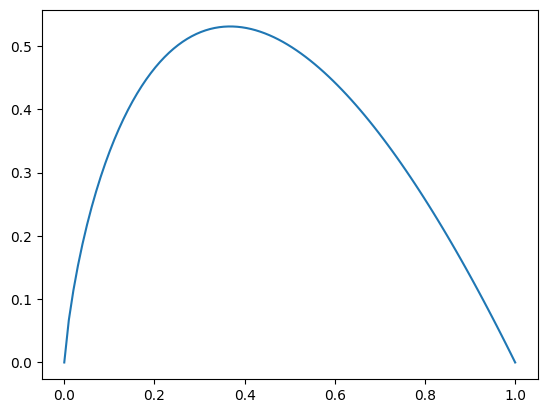

In [73]:
plt.plot(x_range,y(x_range))

In [75]:
y(x_range).sum()

np.float64(35.6974969747305)

In [ ]:
DF.groupby("A2M")["SUBCLASS"].value_counts()

A2M            SUBCLASS
A1043T         UCEC         1
A1061V I1056I  KIPAN        1
               KIRC         1
A1108T         STES         1
A1379A         SKCM         1
                           ..
WT             ACC         72
               DLBC        36
Y1055C         BRCA         1
Y1104D         SARC         1
Y1216Y         LUSC         1
Name: count, Length: 173, dtype: int64